## In this file a "layered" NK model is generated and its properties are examined.
The layered NK model consists of a landscape consisting of a weighted average of other NK Landscapes 


In [18]:
##First Load in potentially relevant packages
import numpy as np
import matplotlib.pyplot as plt
import array
import random
import pandas as pd
import itertools
import operator
from scipy import stats
import itertools as it

In [49]:
def Fitness_Mapping(Landscape):
    #Get N and K
    N=len(Landscape)
    K=int(np.log2(len(Landscape[0]))-1)

    all_permutations = list(itertools.product([0,1],repeat=N))

    Fitnesses = []
    for perm in all_permutations:
        Fitnesses.append(Get_Landscape_Fitness(Landscape, perm))
    
    All_Fitness_Data_Frame=pd.DataFrame(Fitnesses,index=all_permutations,columns=["Fitness"])

    return(All_Fitness_Data_Frame)

def Get_Landscape_Fitness(Landscape,Position):
    N=len(Landscape)
    totalFitness = 0
    K=int(np.log2(len(Landscape[0]))-1)
    #Loop through all N
    for currIndex in np.arange(N):
        #get the fitness indices from each k based upon local gene values
        localgenes = Position[currIndex:currIndex+K+1]
        #loop through to next if were are near the nth index
        if currIndex+K+1 > N:
            localgenes = np.append(localgenes,Position[ 0:currIndex-(N-K)+1])
        #get index fitness  is stored at
        interactIndex = ((2**(np.arange(K+1)*(localgenes)))*localgenes).sum()
        #update fitness
        totalFitness = totalFitness + Landscape[currIndex,interactIndex]
    return(totalFitness/N)

In [20]:
###Define Some key functions
## Generate a random position on Landscape
##INPUTS
#N - N 
def Position_rand(N):
    Pos = (np.random.rand(N)>0.5).astype(int)
    Pos = Pos.astype(int)

    return(Pos)

#### get_fitness_One_Landscape Fitness
# This function gets the fitness averaged across the N variables for a given position
# on a single "unlayered" Landscape
###Inputs:
###Landscape - Landscape Values
###Position - Your Current Position / vector of Interactions
###Output  - Average fitness
def Get_Fitness_One_Landscape(Landscape,Position):
    N=len(Landscape)
    totalFitness = 0
    K=int(np.log2(len(Landscape[0]))-1)
    #Loop through all N
    for currIndex in np.arange(N):
        #get the fitness indices from each k based upon local gene values
        localgenes = Position[currIndex:currIndex+K+1]
        #loop through to next if were are near the nth index
        if currIndex+K+1 > N:
            localgenes = np.append(localgenes,Position[ 0:currIndex-(N-K)+1])
        #get index fitness  is stored at
        interactIndex = ((2**(np.arange(K+1)*(localgenes)))*localgenes).sum()
        #update fitness
        totalFitness = totalFitness + Landscape[currIndex,interactIndex]
    return(totalFitness/N)

###Using autocorr, make a function that inputs the number of steps (lag range) to compute autocorrelation for
###Inputs:
#TimeData: Time Series of Fitness
#lag_range: Maximum number of steps to calculate correlation over
def Get_AR(TimeData, lag_range):
    #convert to tome series
    s = pd.Series(TimeData)
    AR=[]
    #loop over ranges
    for r in range(lag_range):
        AR.append(s.autocorr(lag=r))
    return(AR)


## Create a Random Walker, that will for randomly walk across the landscape
## Inputs: Steps, initPosition, Landscape
## Steps - Number of steps the walker takes
## initPosition - inital postition of walker
## Landscape - Input of landscape values
### Outputs: FitnessTime
## FitnessHistory - Fitness recorded over time of the random walker

def random_walker(Steps, initPosition, Landscape):
    #Get N
    N=len(Landscape)

    #Set current position
    currPosition = initPosition
    
    #Get first fitness value
    FitnessHistory=Get_Fitness_One_Landscape(Landscape,currPosition)
    for j in range(Steps):
        #Take a step by picking a random gene to change
        toChange = random.randint(0,N-1)
        #this changes 0 to 1 and 1 to zero
        currPosition[toChange] = abs(currPosition[toChange]-1)
        #Append to fitness data
        FitnessHistory =  np.append(FitnessHistory,Get_Fitness_One_Landscape(Landscape,currPosition))

    return(FitnessHistory)



AA: Great job on the functions above and below! -JA

In [21]:
#### Get_Fitness_Layered_Landscape
# This function gets the fitness averaged 2 landscapes (hence layering)
###Inputs:
###Landscape1 - Landscape1 Values
###Landscape2 - Landscape1 Values
###Weights - Vector of weights <w_1,w_2> to average fitness over the two landscapes
###Position - Your Current Position / vector of Interactions
###Output  - Average fitness over the two landscapes
def Get_Fitness_Layered_Landscape(Landscape1, Landscape2, Landscape_Weights, Position):
    ##First get the fitness for the first landscape
    N=len(Landscape1)
    K=int(np.log2(len(Landscape1[0]))-1)

    totalFitness = 0
    #Loop through all N
    for currIndex in np.arange(N):
        #get the fitness indices from each k based upon local gene values
        localgenes = Position[currIndex:currIndex+K+1]
        #loop through to next if were are near the nth index
        if currIndex+K+1 > N:
            localgenes = np.append(localgenes,Position[ 0:currIndex-(N-K)+1])
        #get index fitness  is stored at
        interactIndex = ((2**(np.arange(K+1)*(localgenes)))*localgenes).sum()
        #update fitness
        totalFitness = totalFitness + Landscape1[currIndex,interactIndex]
    Landscape1Fitness = totalFitness/N

 ##Now get the fitness for the first landscape
    N=len(Landscape2)
    K=int(np.log2(len(Landscape2[0]))-1)

    totalFitness = 0
    #Loop through all N
    for currIndex in np.arange(N):
        #get the fitness indices from each k based upon local gene values
        localgenes = Position[currIndex:currIndex+K+1]
        #loop through to next if were are near the nth index
        if currIndex+K+1 > N:
            localgenes = np.append(localgenes,Position[ 0:currIndex-(N-K)+1])
        #get index fitness  is stored at
        interactIndex = ((2**(np.arange(K+1)*(localgenes)))*localgenes).sum()
        #update fitness
        totalFitness = totalFitness + Landscape2[currIndex,interactIndex]
    Landscape2Fitness = totalFitness/N
    
    
    ##Now return the weighted average as a  scalar
    #print(np.dot(np.array([Landscape1Fitness,Landscape2Fitness]),Landscape_Weights , out=None))
    return Landscape1Fitness + Landscape2Fitness

In [22]:
##define A random walker over the layered landscape

## Create a Random Walker, that will for randomly walk across the landscape
## Inputs: Steps, initPosition, Landscape
## Steps - Number of steps the walker takes
## initPosition - inital postition of walker
## Landscape - Input of landscape values
### Outputs: FitnessTime
## FitnessHistory - Fitness recorded over time of the random walker

def random_walker_layered(Steps, initPosition, Landscape1, Landscape2, Landscape_Weights):
    #Get N
    N=len(Landscape1)

    #Set current position
    currPosition = initPosition
    
    #Get first fitness value
    FitnessHistory=Get_Fitness_Layered_Landscape(Landscape1, Landscape2, Landscape_Weights, currPosition)
    for j in range(Steps):
        #Take a step by picking a random gene to change
        toChange = random.randint(0,N-1)
        #this changes 0 to 1 and 1 to zero
        currPosition[toChange] = abs(currPosition[toChange]-1)
        #Append to fitness data
        FitnessHistory =  np.append(FitnessHistory,Get_Fitness_Layered_Landscape(Landscape1, Landscape2, Landscape_Weights, currPosition))

    return(FitnessHistory)


In [23]:
#### Get_Fitness_Layered_Landscape_Alternative
# This function gets the fitness by multiplying the fitness from two landscapes
##the intuition is E[X*Y] = E[X]*E[Y] since independent, if E[X]=E[Y]=1 then E[X*Y]=E[X]=E[Y]
##induce equality by adding 0.5 to fitness so E[X]=E[Y]=1
##This landscape has higher variance than just summing


###Inputs:
###Landscape1 - Landscape1 Values
###Landscape2 - Landscape1 Values
###Position - Your Current Position / vector of Interactions
###Output  - Average fitness over the two landscapes
def Get_Fitness_Layered_Landscape_Alternative(Landscape1, Landscape2, Position):
    ##First get the fitness for the first landscape
    N=len(Landscape1)
    K=int(np.log2(len(Landscape1[0]))-1)

    totalFitness = 0
    #Loop through all N
    for currIndex in np.arange(N):
        #get the fitness indices from each k based upon local gene values
        localgenes = Position[currIndex:currIndex+K+1]
        #loop through to next if were are near the nth index
        if currIndex+K+1 > N:
            localgenes = np.append(localgenes,Position[ 0:currIndex-(N-K)+1])
        #get index fitness  is stored at
        interactIndex = ((2**(np.arange(K+1)*(localgenes)))*localgenes).sum()
        #update fitness
        totalFitness = totalFitness + Landscape1[currIndex,interactIndex]
    Landscape1Fitness = totalFitness/N 

 ##Now get the fitness for the first landscape
    N=len(Landscape2)
    K=int(np.log2(len(Landscape2[0]))-1)

    totalFitness = 0
    #Loop through all N
    for currIndex in np.arange(N):
        #get the fitness indices from each k based upon local gene values
        localgenes = Position[currIndex:currIndex+K+1]
        #loop through to next if were are near the nth index
        if currIndex+K+1 > N:
            localgenes = np.append(localgenes,Position[ 0:currIndex-(N-K)+1])
        #get index fitness  is stored at
        interactIndex = ((2**(np.arange(K+1)*(localgenes)))*localgenes).sum()
        #update fitness
        totalFitness = totalFitness + Landscape2[currIndex,interactIndex]
    Landscape2Fitness = totalFitness/N
    
    ##Now return the weighted average as a  scalar
    #print(np.dot(np.array([Landscape1Fitness,Landscape2Fitness]),Landscape_Weights , out=None))
    return((Landscape2Fitness+0.5)*(Landscape1Fitness+0.5))


In [24]:
## Define A random walker over the alternative layered landscape

## Create a Random Walker, that will for randomly walk across the landscape
## Inputs: Steps, initPosition, Landscape
## Steps - Number of steps the walker takes
## initPosition - inital postition of walker
## Landscape - Input of landscape values
### Outputs: FitnessTime
## FitnessHistory - Fitness recorded over time of the random walker

def random_walker_layered_alternative(Steps, initPosition, Landscape1, Landscape2):
    #Get N
    N=len(Landscape1)

    #Set current position
    currPosition = initPosition
    
    #Get first fitness value
    FitnessHistory=Get_Fitness_Layered_Landscape_Alternative(Landscape1, Landscape2, currPosition)
    for j in range(Steps):
        #Take a step by picking a random gene to change
        toChange = random.randint(0,N-1)
        #this changes 0 to 1 and 1 to zero
        currPosition[toChange] = abs(currPosition[toChange]-1)
        #Append to fitness data
        FitnessHistory =  np.append(FitnessHistory,Get_Fitness_Layered_Landscape_Alternative(Landscape1, Landscape2, currPosition))

    return(FitnessHistory)


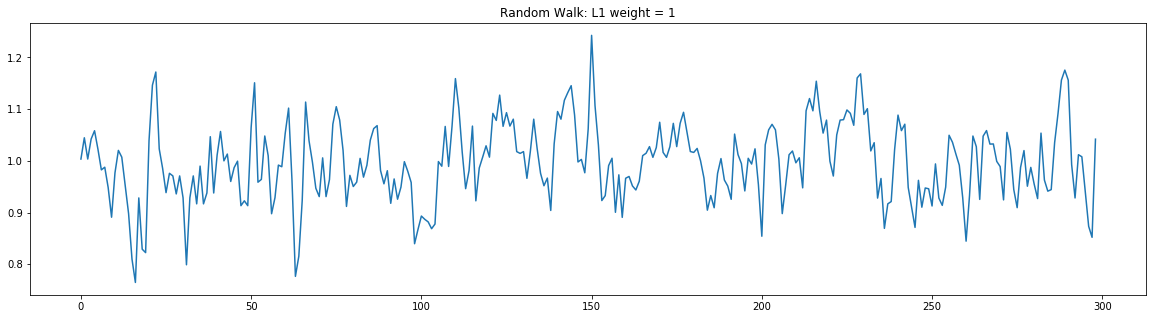

[0.93362434 1.0176551  1.03355188 ... 1.06832317 1.04912308 0.96918191]


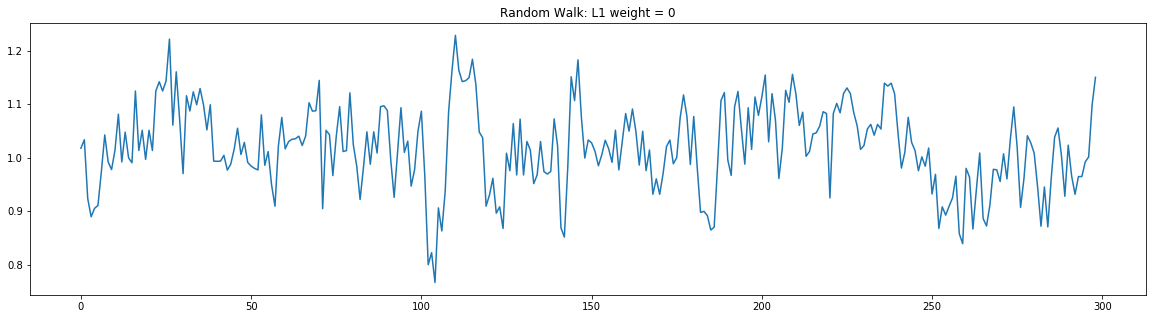

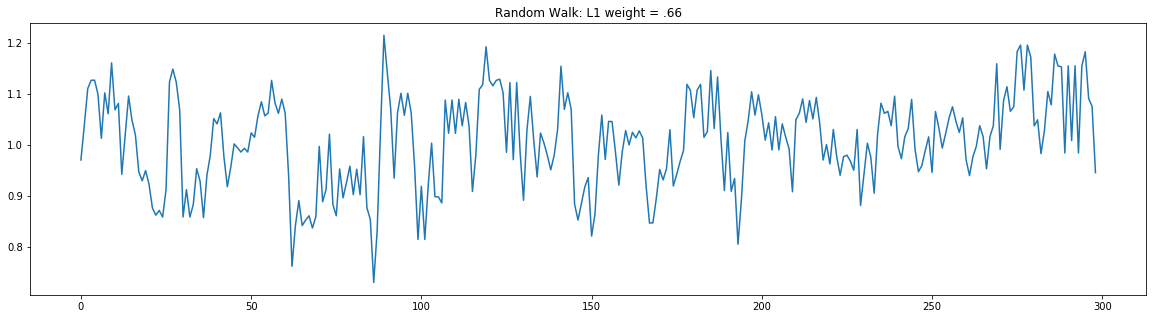

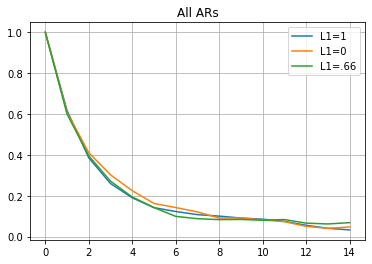

In [25]:
## TESTING and EXAMINATION
##Generate two NK Landscapes and define weights

##Generate NK Landscape 1
N = 15
K1 = 0 
NK_land_1 = np.random.rand(N, 2**(K1+1))

##Generate NK Landscape 2
N = 15
K2 = 5
NK_land_2 = np.random.rand(N, 2**(K2+1))

#get a position
iPosition = Position_rand(N)

Weights = np.array([1,0]) # all K=0 landscape


numSteps=5000
FitnessPath = random_walker_layered(numSteps,iPosition,NK_land_1,NK_land_2,Weights)

##plot the data
plt.figure(figsize=(20,5))
plt.plot(FitnessPath[1:300])
plt.title("Random Walk: L1 weight = 1")
plt.show()
oneweight = Get_AR(FitnessPath,lag_range=N)
#plt.plot(oneweight)
#plt.title("Autocorrelation: L1 weight = 1")
#plt.show()
#print('The standard deviation is',np.var(FitnessPath)**.5)

##Now alter weights and plot again

Weights =np.array([0,1])


FitnessPath = random_walker_layered(numSteps,iPosition,NK_land_1,NK_land_2,Weights)
print(FitnessPath)

##plot the data
plt.figure(figsize=(20,5))
plt.plot(FitnessPath[1:300])
plt.title("Random Walk: L1 weight = 0")
plt.show()
zeroweight = Get_AR(FitnessPath,lag_range=N)
#plt.plot(zeroweight)
#plt.title("Autocorrelation: L1 weight = 0")
#plt.show()
#print('The standard deviation is',np.var(FitnessPath)**.5)

##Now alter weights and plot again

Weights =np.array([.66,.34])


FitnessPath = random_walker_layered(numSteps,iPosition,NK_land_1,NK_land_2,Weights)

##plot the data
plt.figure(figsize=(20,5))
plt.plot(FitnessPath[1:300])
plt.title("Random Walk: L1 weight = .66")
plt.show()
twothirdsweight = Get_AR(FitnessPath,lag_range=N)
#plt.plot(twothirdsweight)
#plt.title("Autocorrelation: L1 weight = .66")
#plt.show()
#print('The standard deviation is',np.var(FitnessPath)**.5)

plt.plot(oneweight, label="L1=1")
plt.plot(zeroweight, label="L1=0")
plt.plot(twothirdsweight, label="L1=.66")
plt.grid()
plt.title("All ARs")
plt.legend()
plt.show()


## Looking at the autocorrelation curves for standard landscapes

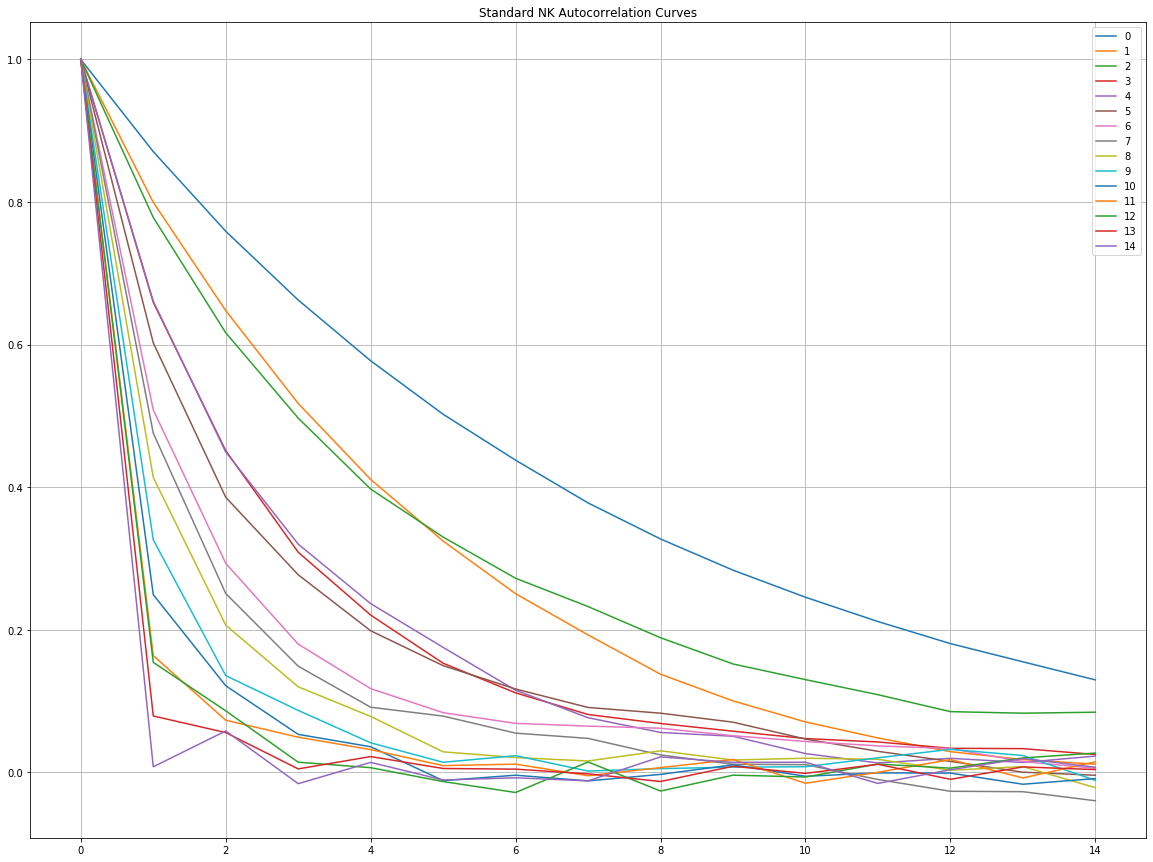

In [26]:
N = 15
numSteps=5000
plt.figure(figsize=(20,15))
for k in range(15):
    NK_land = np.random.rand(N, 2**(k+1))
    iPosition = Position_rand(N)
    FitnessPath = random_walker(numSteps,iPosition,NK_land)
    AR_curve = Get_AR(FitnessPath,lag_range=N)
    plt.plot(AR_curve, label=k)
plt.legend()
plt.grid()
plt.title("Standard NK Autocorrelation Curves")
plt.show()



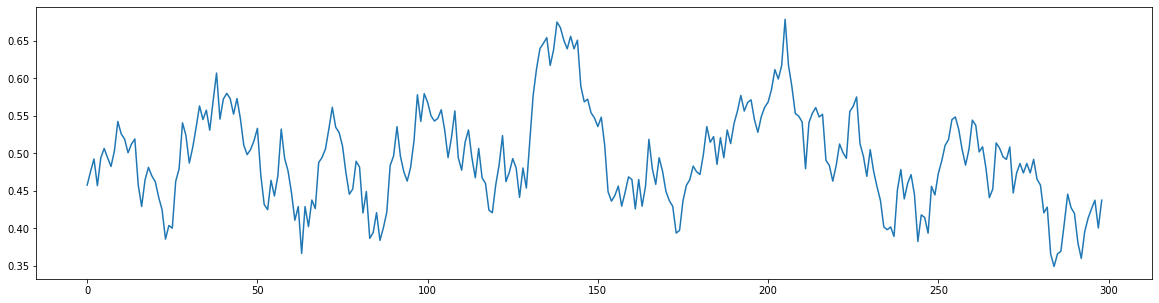

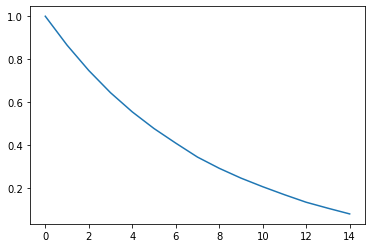

The standard deviation is 0.05938409133276912


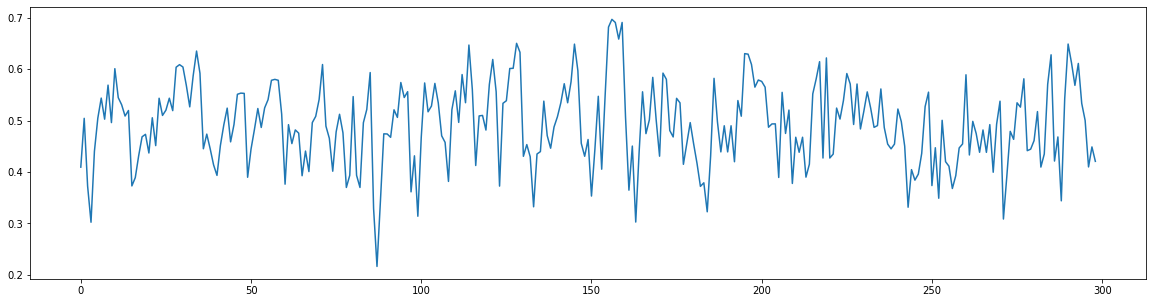

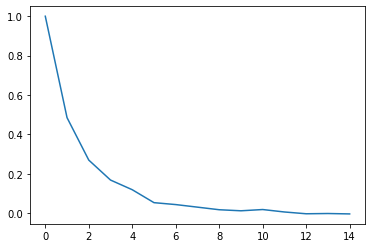

The standard deviation is 0.0747442989987992


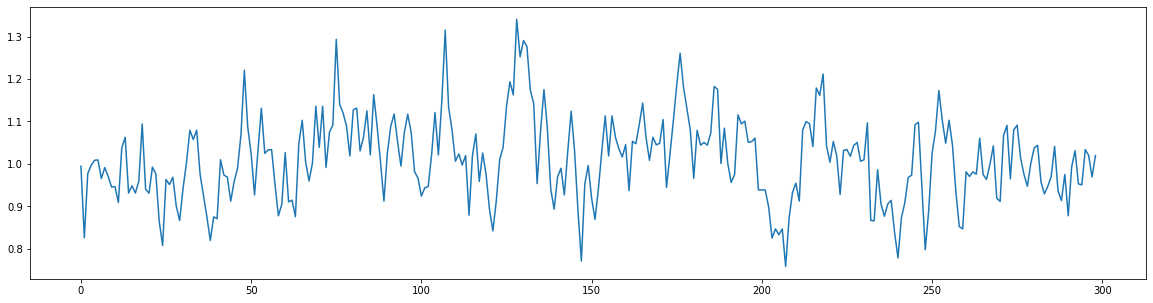

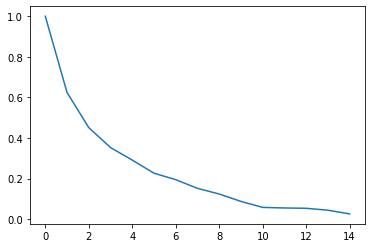

The standard deviation is 0.09916641201831619


In [27]:
##More testing and examination
#Now plot the alternative Landscape
##Generate two NK Landscapes and define weights

##Generate NK Landscape 1
N = 15
K1 = 0 
NK_land_1 = np.random.rand(N, 2**(K1+1))

##Generate NK Landscape 2
N = 15
K2 = 7
NK_land_2 = np.random.rand(N, 2**(K2+1))

#get a position
iPosition = Position_rand(N)

Weights =np.array([1,0])


numSteps=5000
FitnessPath =random_walker(numSteps, iPosition, NK_land_1)

##plot the data
plt.figure(figsize=(20,5))
plt.plot(FitnessPath[1:300])
plt.show()
plt.plot(Get_AR(FitnessPath,lag_range=N))
plt.show()
print('The standard deviation is',np.var(FitnessPath)**.5)

##Now alter weights and plot again


FitnessPath = random_walker(numSteps, iPosition, NK_land_2)


##plot the data
plt.figure(figsize=(20,5))
plt.plot(FitnessPath[1:300])
plt.show()
plt.plot(Get_AR(FitnessPath,lag_range=N))
plt.show()
print('The standard deviation is',np.var(FitnessPath)**.5)

##Now alter weights and plot again

Weights =np.array([.5,.5])


FitnessPath = random_walker_layered_alternative(numSteps,iPosition,NK_land_1,NK_land_2)

##plot the data
plt.figure(figsize=(20,5))
plt.plot(FitnessPath[1:300])
plt.show()
plt.plot(Get_AR(FitnessPath,lag_range=N))
plt.show()
print('The standard deviation is',np.var(FitnessPath)**.5)

0.7231768261663912


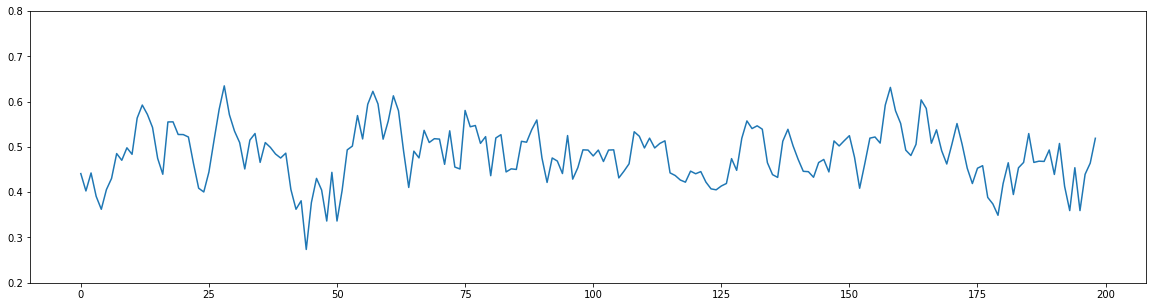

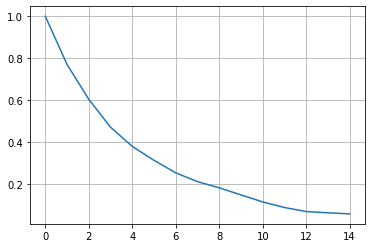

The standard deviation is 0.0705347089201515
0.7477935012291328


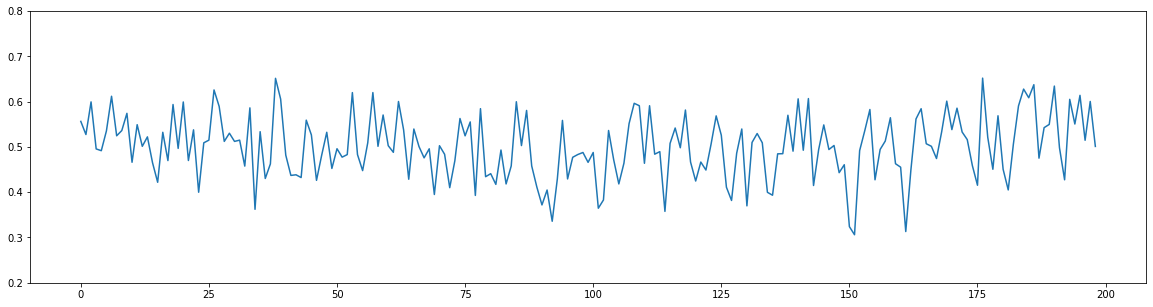

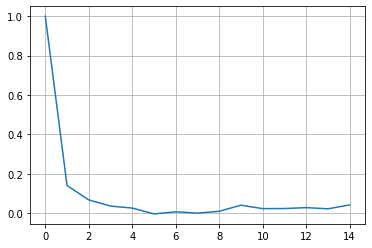

The standard deviation is 0.07413115161438517


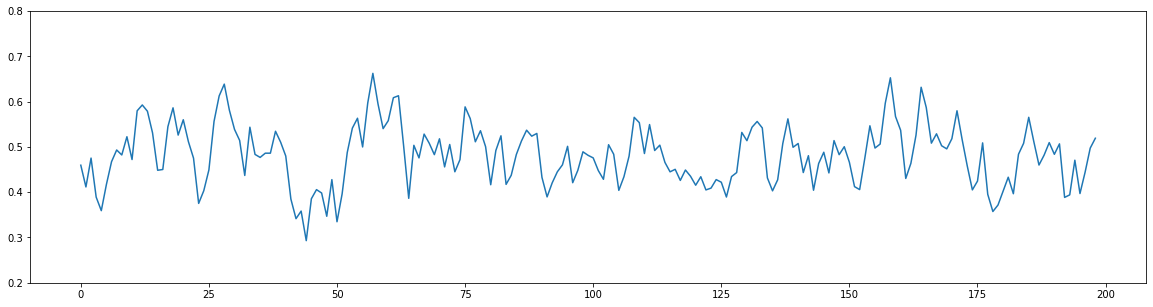

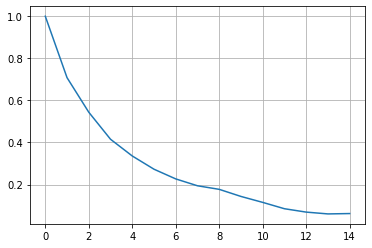

The standard deviation is 0.07534380945933845


In [28]:
##Another series, but this time just add
##Now plot the alternative Landscape
##Generate two NK Landscapes and define weights

##Generate NK Landscape 1
N = 15
K1 = 2 
NK_land_1 = np.random.rand(N, 2**(K1+1))

##Generate NK Landscape 2
N = 15
K2 = 12
NK_land_2 = np.random.rand(N, 2**(K2+1))

#get a position
iPosition = Position_rand(N)

Weights =np.array([1,0])


numSteps=5000
FitnessPath1 =random_walker(numSteps, iPosition, NK_land_1)
print(max(FitnessPath1))

##plot the data
plt.figure(figsize=(20,5))
plt.ylim(.2, .8)
plt.plot(FitnessPath1[1:200])
plt.show()
plt.plot(Get_AR(FitnessPath1,lag_range=N))
plt.grid()
plt.show()
print('The standard deviation is',np.var(FitnessPath1)**.5)

##Now alter weights and plot again


FitnessPath2 = random_walker(numSteps, iPosition, NK_land_2)
print(max(FitnessPath2))


##plot the data
plt.figure(figsize=(20,5))
plt.ylim(.2, .8)
plt.plot(FitnessPath2[1:200])
plt.show()
plt.plot(Get_AR(FitnessPath2,lag_range=N))
plt.grid()
plt.show()
print('The standard deviation is',np.var(FitnessPath2)**.5)

FitnessPath3 = FitnessPath1+0.333*(FitnessPath2-np.mean(FitnessPath2))


##plot the data
plt.figure(figsize=(20,5))
plt.ylim(.2, .8)
plt.plot(FitnessPath3[1:200])
plt.show()
plt.plot(Get_AR(FitnessPath3,lag_range=N))
plt.grid()
plt.show()
print('The standard deviation is',np.var(FitnessPath3)**.5)

## Trying out the Dirichlet landscape


In [29]:

#r = gamma_dist.rvs(size=5000)
#plt.hist(r, bins=100)

In [30]:
gamma_dist = stats.gamma(7,1)
dirich_alphas = gamma_dist.rvs(N) # We need N concentration parameters
our_dirichlet = stats.dirichlet(dirich_alphas)

In [31]:
our_dirichlet.rvs()

array([[0.08901982, 0.08975128, 0.0811451 , 0.01829286, 0.06692268,
        0.04871978, 0.08983222, 0.03652491, 0.06258538, 0.07560738,
        0.02572961, 0.09395793, 0.084536  , 0.068116  , 0.06925905]])

In [32]:

def random_walker_Dir(Steps, FitnessMap):

    #Get N
    N=len(FitnessMap.iloc[0].name)

    #Set random starting position
    currPosition = (np.random.rand(N)>0.5).astype(int)

    #Get first fitness value
    FitnessHistory=[FitnessMap.loc["".join([str(i) for i in currPosition])].Fitness]
    for j in range(Steps):
        #Take a step by picking a random gene to change
        toChange = random.randint(0,N-1)
        #this changes 0 to 1 and 1 to zero
        currPosition[toChange] = abs(currPosition[toChange]-1)
        #Append to fitness data
        fit = FitnessMap.loc["".join([str(i) for i in currPosition])].Fitness
        FitnessHistory.append(fit)

    return FitnessHistory


def make_Dirichland(N,K, concentration_params, scalar=2):

    our_dirichlet = stats.dirichlet(concentration_params) #the distribution we use

    NK_land = np.random.rand(N, 2**(K+1))

    fitnesses = []
    permutations = []
    dir_draw = our_dirichlet.rvs()[0]

    for permutation in list(itertools.product([0,1],repeat=N)):
        
        genome_fitness = 0
        for currIndex in np.arange(N):
            #get the fitness indices from each k based upon local gene values
            localgenes = permutation[currIndex:currIndex+K+1]
            #loop through to next if were are near the nth index
            if currIndex+K+1 > N:
                localgenes = np.append(localgenes,permutation[0:currIndex-(N-K)+1])
            #get index fitness  is stored at
            interactIndex = ((2**(np.arange(K+1)*(localgenes)))*localgenes).sum()
            #update fitness
    
            genome_fitness += NK_land[currIndex,interactIndex] * (1-dirich_alphas[currIndex])
        fitnesses.append(genome_fitness)
        permutations.append("".join([str(i) for i in permutation]))
            
    return pd.DataFrame(fitnesses,index=permutations,columns=["Fitness"])


In [33]:
N = 10

DirK = 4
gamma_dist = stats.gamma(.5,1) 
Dirichland = make_Dirichland(N,DirK,gamma_dist)

 [.025,.025, 0.025, .10,.55,.10,.10,.025,.025,0.025]

K1 = 0
NK_land_1 = np.random.rand(N, 2**(K1+1))

K2 = 4
NK_land_2 = np.random.rand(N, 2**(K2+1))

#get a position
iPosition = Position_rand(N)
Weights = np.array([1,0]) # all K=0 landscape


numSteps=5000

FitnessPath_Dirich = random_walker_Dir(numSteps, Dirichland)

FitnessPath_NK1 = random_walker(numSteps, iPosition, NK_land_1)
FitnessPath_NK2 = random_walker(numSteps, iPosition, NK_land_2)

plt.figure(figsize=(20,5))
plt.title("N={} K={}".format(N,K1), size=24)
plt.plot(FitnessPath_NK1[1:200],c="b")
plt.show()
plt.figure(figsize=(20,5))
plt.title("N={} K={}".format(N,K2), size=24)
plt.plot(FitnessPath_NK2[1:200],c="r")
plt.show()
plt.figure(figsize=(20,5))
plt.plot(FitnessPath_Dirich[1:200],c="g")
plt.title("Dirichlet N={} K={}".format(N,DirK), size=24)
plt.show()


Dirichlet_AR = Get_AR(FitnessPath_Dirich,lag_range=N)
NK1_AR = Get_AR(FitnessPath_NK1,lag_range=N)
NK2_AR = Get_AR(FitnessPath_NK2,lag_range=N)
plt.plot(Dirichlet_AR,c="g",linewidth=3)
plt.plot(NK1_AR,c="b")
plt.plot(NK2_AR,c="r")
plt.show()


IndentationError: unexpected indent (<ipython-input-33-67f9f73e0019>, line 7)

# Comprehensive census of fitness values

We look at the histogram of all possible fitnesses as another way assessing differences because I'm wondering if global shape can be hard to pick up with autocorrelations.

In [37]:

Dirichlet_fits = []
NK_K1_fits = []
NK_K2_fits = []

for permu in it.product(range(2),repeat=N):
    Dirichlet_fits.append(Get_Fitness_One_Landscape(Dirichlet_landscape,permu))
    NK_K1_fits.append(Get_Fitness_One_Landscape(NK_land_1,permu))
    NK_K2_fits.append(Get_Fitness_One_Landscape(NK_land_2,permu))
    
plt.hist(Dirichlet_fits)
plt.title("Dirichlet fitnesses")
plt.show()

plt.hist(NK_K1_fits)
plt.title("NK K={} fitnesses".format(K1))
plt.show()

plt.hist(NK_K2_fits)
plt.title("NK K={} fitnesses".format(K2))
plt.show()
    
    

NameError: name 'Dirichlet_landscape' is not defined

## Landscape Statistics Functions
First we shall define a function to evaluate the landscape. We shall make a function that identifies the fitness of every point on a landscape.

In [51]:
##This function finds the global maximum on layered and unlayered landscapes
### INPUTS
# Landscape1: The primary landscape
# Landscape2: The secondary landscape if using layered landscapes
# Landscape_Weights: the weights for creating a layered landscape with respect to Landscape1 and 2
# Fitness_Function: One of {'Get_Fitness_One_Landscape', 'Get_Fitness_Layered_Landscape', 
# 'Get_Fitness_Layered_Landscape_Alternative'} The Landscape type, used to calcuate fitness for unlayered, layered, and the multiplicative
# alternative layered respectively.
### OUTPUT
# All_Fitness_Data_Frame : A dataframe of every fitness and position,
# may easily then use max function to get fitnesses.

def Fitness_Mapping(Landscape1, Landscape2, Landscape_Weights,Fitness_Function):
    #Get N and K
    N=len(Landscape1)
    K=int(np.log2(len(Landscape1[0]))-1)

    ## Yes, thank god for Stackoverflow, but also they can lead us astray. This one liner is easier:
    all_permutations = itertools.product([0,1],repeat=N)
    
    ##The for loop below creates a list of all 2^N permutations

    for j in range(N+1):
        #Get a list of zeros
        if j==0:
            all_permutations=np.zeros((1,N),dtype="int8")
        if j>=1:
            #this works, not fully understood by me, but thank god for stackoverflow.
            which = np.array(list(itertools.combinations(range(N), j)))
            #set a grid of zeros
            grid = np.zeros((len(which), N), dtype="int8")
            #change
            grid[np.arange(len(which))[None].T, which] = 1
            #Magic
            all_permutations = np.concatenate((all_permutations, grid))
            #Now we have a list of all possible permutations in all_permutations
    
    #print(all_permutations)
    ##now loop over all permutations to get the fitness, saving each fitness,
    #and also recording the maximum and minimum positions
    All_Fitness=[]
    MaxFitness=-1000
    MaxFitnessLocation=np.zeros(N)
    MinFitness=1000
    MinFitnessLocation=np.zeros(N)
    for permutation in all_permutations:
        ##Get fitness based upon type 
        if Fitness_Function == 'Get_Fitness_One_Landscape':
            Current_Fitness = Get_Fitness_One_Landscape(Landscape1,permutation)
            
        if  Fitness_Function == 'Get_Fitness_Layered_Landscape':
            Current_Fitness = Get_Fitness_Layered_Landscape(Landscape1, Landscape2, Landscape_Weights, permutation)

        if  Fitness_Function == 'Get_Fitness_Layered_Landscape_Alternative':
            Current_Fitness = Get_Fitness_Layered_Landscape_Alternative(Landscape1, Landscape2, permutation)
                 
        All_Fitness.append(Current_Fitness)
                 
    All_Fitness_Data_Frame=pd.DataFrame(pd.Series(All_Fitness))
    ##also store corresponding location
    #print(all_permutations)
    All_Fitness_Data_Frame.loc[:,'Location'] = list(all_permutations)
    #rename the first column as fitness
   # All_Fitness_Data_Frame.columns.values[0] = 'Fitness'
        #if Current_Fitness < MinFitness:
        #         MinFitness = Current_Fitness
        #         MinFitnessLocation = permutation
        #if Current_Fitness > MaxFitness:
        #         MaxFitness = Current_Fitness
         #        MaxFitnessLocation = permutation
                 
    return(All_Fitness_Data_Frame)
                                  

In [52]:
###Calculate the Epistasis Variance for the Modified NK Landscape
##This is very computationally intensive for generating landscape statistics layered, so I refrain from using it.
###Inputs:
#Landscape: The Landscape
#Samples: Number of samples to calculate

def Eptistatis_Variance_All_Models(Landscape1, Landscape2, Landscape_Weights,Fitness_Function, Samples):
    #intialize n
    N=int(len(Landscape1))
    #Sample many random points on the landscape and store the fitnesses
    SamplingFrame = [Position_rand(N) for x in range(Samples)]
    ##get 
        ##Get fitness based upon type 
    if Fitness_Function == 'Get_Fitness_One_Landscape':
        Fitnesses = [Get_Fitness_One_Landscape(Landscape1,X) for X in SamplingFrame]

    if  Fitness_Function == 'Get_Fitness_Layered_Landscape':
        Fitnesses = [Get_Fitness_Layered_Landscape(Landscape1, Landscape2, Landscape_Weights, X) for X in SamplingFrame]

    if  Fitness_Function == 'Get_Fitness_Layered_Landscape_Alternative':
        Fitnesses = [Get_Fitness_Layered_Landscape_Alternative(Landscape1, Landscape2, X) for X in SamplingFrame]

    #Fitnesses = [get_fitness_Product_World(Landscape,X) for X in SamplingFrame]


    
    MeanFitness=sum(Fitnesses)/len(Fitnesses)
    #normalize the fitnesses by getting the standard deviation
    FitnessesVar = (Fitnesses-MeanFitness)**2
    FitnessesSD = FitnessesVar**0.5
    NormalizedFitnesses=(Fitnesses-MeanFitness)/FitnessesSD
    
    #Now reset MeanFitness to 0
    MeanFitness = sum(NormalizedFitnesses)/len(NormalizedFitnesses)

    ##convert to pandas dataframe
    SamplingFrame=pd.DataFrame(SamplingFrame)
    
    
    ##Now get the alleles' excess values
    #first initialize a matrix to store the values
    ExcessAlleleValue=pd.DataFrame(np.zeros([N, 2])*np.nan)
    ##loop over the alleles
    for a in range(N):
        #print(a)
        ##Find Matches with value 0
        AllelesMatch = SamplingFrame[SamplingFrame.loc[:,a]==0]
        
        #get the excess allele value and store it
        #Varies by fitness function
        if Fitness_Function == 'Get_Fitness_One_Landscape':
            ExcessAlleleValue.iloc[a,0] = AllelesMatch.apply(lambda row : Get_Fitness_One_Landscape(Landscape1,row),
                                                             axis = 1).mean()-MeanFitness
        if  Fitness_Function == 'Get_Fitness_Layered_Landscape':
            ExcessAlleleValue.iloc[a,0] = AllelesMatch.apply(lambda row : Get_Fitness_Layered_Landscape(Landscape1, Landscape2, Landscape_Weights, row),
                                                             axis = 1).mean()-MeanFitness

        if  Fitness_Function == 'Get_Fitness_Layered_Landscape_Alternative':
            ExcessAlleleValue.iloc[a,0] = AllelesMatch.apply(lambda row : Get_Fitness_Layered_Landscape_Alternative(Landscape1, Landscape2, row),
                                                             axis = 1).mean()-MeanFitness

            
        
        ##Repeat for when allele matches to one
        
        AllelesMatch = SamplingFrame[SamplingFrame.loc[:,a]==1]
        #get the excess allele value and store it
        #Varies by fitness function
        if Fitness_Function == 'Get_Fitness_One_Landscape':
            ExcessAlleleValue.iloc[a,1] = AllelesMatch.apply(lambda row : Get_Fitness_One_Landscape(Landscape1,row),
                                                             axis = 1).mean()-MeanFitness
        if  Fitness_Function == 'Get_Fitness_Layered_Landscape':
            ExcessAlleleValue.iloc[a,1] = AllelesMatch.apply(lambda row : Get_Fitness_Layered_Landscape(Landscape1, Landscape2, Landscape_Weights, row),
                                                             axis = 1).mean()-MeanFitness

        if  Fitness_Function == 'Get_Fitness_Layered_Landscape_Alternative':
            ExcessAlleleValue.iloc[a,1] = AllelesMatch.apply(lambda row : Get_Fitness_Layered_Landscape_Alternative(Landscape1, Landscape2, row),
                                                             axis = 1).mean()-MeanFitness        
    #Now calculate the  Geneic Value for a string as the sum of mean fitness and excess allele value
    #Get the corresponding values by taking the diagonal of this matrix,
    #as along the diagonal will be the corresponding value, then sum to get genic value
    ExcessGenicValues = SamplingFrame.apply(lambda row : np.diag(ExcessAlleleValue.iloc[:,row]).sum(), axis = 1)

    ##get the genic Value of a string by adding the average fitness
    GenicValues = MeanFitness + ExcessGenicValues

    ##Get Epistatis value (essentially the error term)
    EpistatisValues =  Fitnesses - GenicValues

    ##finally get the epistasis variance
    EpistasisVariance = sum(EpistatisValues**2)/len(EpistatisValues)

    return(EpistasisVariance)


        

In [53]:
####UNFINISHED
## Now I will define a function that simulates walks from the farthest point from the maximal position
## to the maximum position. It randomly selects without replacement one gene to change to get to the max
## then tracks fitness change

##our goal now is to analyze 
def Go_To_Max(Maximum_Location,Fitness_Function,Landscape1,Landscape2,Landscape_Weights):
    #get length of position (number of indices)
    Length = len(Maximum_Location)
    #Initialize the farthest position.
    Farthest_position = abs(Maximum_Location-1)
    #Set an array of random indices to loop through
    Random_Indices = random.sample(range(10), 10)
    #initalize variables
    New_Fitness = -101
    Old_Fitness = -100
    #initalize old fitness
    ##Get fitness
    if Fitness_Function == 'Get_Fitness_One_Landscape':
        Old_Fitness = Get_Fitness_One_Landscape(Landscape1,Farthest_position)

    if  Fitness_Function == 'Get_Fitness_Layered_Landscape':
        Old_Fitness = Get_Fitness_Layered_Landscape(Landscape1, Landscape2,
                                                        Landscape_Weights, Farthest_position)

    if  Fitness_Function == 'Get_Fitness_Layered_Landscape_Alternative':
        Old_Fitness = Get_Fitness_Layered_Landscape_Alternative(Landscape1, Landscape2, Farthest_position)

            
    ###loop to see if you can make it to the top
    while(NewFitness > OldFitness):
        ##choose an index at random to change
        for dimension in Random_Indices:
            Farthest_position[dimension]=Maximum_Location[dimension]
        
            if Fitness_Function == 'Get_Fitness_One_Landscape':
                NewFitness = Get_Fitness_One_Landscape(Landscape1,Farthest_position)
            
            if  Fitness_Function == 'Get_Fitness_Layered_Landscape':
                NewFitness = Get_Fitness_Layered_Landscape(Landscape1, Landscape2,
                                                            Landscape_Weights, Farthest_position)

            if  Fitness_Function == 'Get_Fitness_Layered_Landscape_Alternative':
                NewFitness = Get_Fitness_Layered_Landscape_Alternative(Landscape1, Landscape2, Farthest_position)
        
            if NewFitness > OldFitness:
                
    
    
    for dimension in Random_Indices:
        Farthest_position[dimension]=Maximum_Location[dimension]
        ##Get fitness
        if Fitness_Function == 'Get_Fitness_One_Landscape':
            Current_Fitness = Get_Fitness_One_Landscape(Landscape1,Farthest_position)
            
        if  Fitness_Function == 'Get_Fitness_Layered_Landscape':
            Current_Fitness = Get_Fitness_Layered_Landscape(Landscape1, Landscape2,
                                                            Landscape_Weights, Farthest_position)

        if  Fitness_Function == 'Get_Fitness_Layered_Landscape_Alternative':
            Current_Fitness = Get_Fitness_Layered_Landscape_Alternative(Landscape1, Landscape2, Farthest_position)
                 
    print(Farthest_position)
    
    
return()

IndentationError: expected an indented block (<ipython-input-53-0ad357640fb4>, line 50)

In [54]:
####UNFINISHED

## Now I will define a function that simulates walks from the farthest point from the maximal position
## to the maximum position. It randomly selects without replacement one gene to change to get to the max
## then tracks fitness change

##our goal now is to analyze 
def Go_To_Max(Maximum_Location)
    #get length of position (number of indices)
    Length = len(Maximum_Location)
    #Initialize the farthest position.
    Farthest_position = abs(Maximum_Location-1)

SyntaxError: invalid syntax (<ipython-input-54-c98f7610f187>, line 8)

In [55]:
##This function counts the number of maxima in an NK Fitness Landscape.
#It does this by iterating over every location, identifying the neighbors 
#and then seeing if any have higher fitness
###INPUTS:
#df - An NK fitness landscape with the first column as fitnesses and Location column named' Location'
###OUTPUTS
#Num_Local_Max - The Number of Local Maxima found
 
def Count_Local_Maxima(df):
    #Set A Maxima counter
    Num_Local_Max=0
    #Loop over all rows
    for focal_row in df.itertuples():
        #Identify the Neighbors (distance of 1 from focal row)
        Neighbors = df[df['Location'].apply(lambda row : sum(abs(row-focal_row.Location))==1)]
        #Get the maximum fitness value of the neighbors
        Neighbors_Max = max(Neighbors[0]) #fitness is indexed at 0 here for some reason
        ##See if the neighbors max does not exceed the focal max, if not then it is a local maxima
        if Neighbors_Max < focal_row[1]: #fitness is indexed at 1 here for some reason
            #print('Local Maxima found')
            Num_Local_Max += 1
        #Append the focal row at the end
        #Neighbors.loc[len(Neighbors)]=list(focal_row[1:3])

    return(Num_Local_Max)

In [56]:
##this Function takes as inputs N, K, and generates landscape statistics
#it generates the average path length from the minimum to maximum value and Autocorrelation
####INPUTS
# N : N
# K : K 
# Num_Landscapes :{1,2} The number of landscapes for layered model. If 2 then one landscape has k=0
# Alternative : {True,False} Whether we are using the layered alternative (multiplication)
# Weights : numpy array.  Weights for the standard layered model
# Sample_Size : Number of Sampled landscapes to draw
# Num_Steps : Number of random steps for calculating autocorrelation

####OUTPUTS:
# Average_Min_Max_Distance: The average distance between maximal and minimal positions
# Average_Normalized_Min_Max_Difference: The average normalized difference in fitness
# between maximal and minimal fitness
# Average_Autocorrelation: The average autocorrelation 
# Average_Distance_Percentile_90: The average distance between the location of the
# global maxima and top decile of fitnesses 
# Average_Number_Maxima: The average number of local maxima in a landscape

def Get_LandScape_Statistics(N,K,Num_Landscapes,Alternative,Weights,Sample_Size,Num_Steps):
    ###Create a sample of 400
    NormDiffArray = []
    ChangesArray = []
    AR = []
    EpistasisVariance = []
    Distance_Percentile_90 = []
    Number_Maxima = []
    for j in range(Sample_Size):
        ##For the random walk to get autocorrelation initialize a random position
        iPosition = Position_rand(N)

        ##Generate two landscapes, make one a null landscape for the case of the layered ones (k=0)
        NK_land_1 = np.random.rand(N, 2**(K+1))

        NK_land_null = np.random.rand(N, 2**(0+1))

        if Alternative == True:
            df = Fitness_Mapping(Landscape1 = NK_land_1, Landscape2 = NK_land_null,
                     Landscape_Weights= 0 ,Fitness_Function ='Get_Fitness_Layered_Landscape_Alternative')
            Fitness_Function = 'Get_Fitness_Layered_Landscape_Alternative'
            
            ##Also get the autocorrelation for Num_Steps
            FitnessPath = random_walker_layered_alternative(Num_Steps,iPosition,NK_land_1,NK_land_null)

        
        if Alternative == False and Num_Landscapes==2:
            df = Fitness_Mapping(Landscape1 = NK_land_1, Landscape2 = NK_land_null,
                     Landscape_Weights= Weights ,Fitness_Function ='Get_Fitness_Layered_Landscape')
            Fitness_Function = 'Get_Fitness_Layered_Landscape'

            ##Also get the autocorrelation for Num_Steps
            FitnessPath = random_walker_layered(Num_Steps, iPosition,
                                                NK_land_1, NK_land_null, Weights)

            
        if Alternative == False and Num_Landscapes==1:
            df = Fitness_Mapping(Landscape1 = NK_land_1, Landscape2 = NK_land_2,
                     Landscape_Weights= Weights ,Fitness_Function ='Get_Fitness_One_Landscape')
            Fitness_Function = 'Get_Fitness_One_Landscape'
            ##Also get the autocorrelation for Num_Steps
            FitnessPath = random_walker(Num_Steps, iPosition, NK_land_1)
            
        ##Record the Autocorrelations
        currentAR = Get_AR(FitnessPath,lag_range=N)
        AR.append(currentAR)
            
        ##Now find the maximum and minimum.
        MaximalIndex = df.iloc[:,0].idxmax()    #get the index
        MaximalFitness = df.loc[MaximalIndex,0] #get the fitness value
        MaximalLocation =  df.loc[MaximalIndex,'Location'] #get the gene location
    
        MinimalIndex = df.iloc[:,0].idxmin()
        MinimalFitness = df.loc[MinimalIndex,0]
        MinimalLocation =  df.loc[MinimalIndex,'Location']
      
        #Get normalized difference between min and max (by dividing by standard deviation)
        NormDiffArray.append((MaximalFitness-MinimalFitness)/(df.iloc[:,0].var()**0.5))
        #get distance between min and max 
        ChangesArray.append(sum(abs(MinimalLocation-MaximalLocation)))
        

        
        
        ####Now generate a statistic that finds how close on average, are the 90th percentile and above
        ####fitness to the maximum
        Percentile_90_Cutoff = (df.iloc[:,0].quantile(.90))
        #get those that pass cutoff
        CutoffPassed = df[ df.iloc[:,0]>= Percentile_90_Cutoff ]
        Distances = CutoffPassed['Location'].apply(lambda row : sum(abs(row-MaximalLocation)))
        #print(Distances)
        Average_Distance_Percentile_90=Distances.mean()
        Distance_Percentile_90.append(Average_Distance_Percentile_90)
        
        
        ##Now Identify the Number of Maxima
        Number_Maxima.append(Count_Local_Maxima(df))
        
        
    Average_Min_Max_Distance = (sum(ChangesArray)/len(ChangesArray))
    Average_Normalized_Min_Max_Difference = (sum(NormDiffArray)/len(NormDiffArray))
    Average_Distance_Percentile_90 = np.mean(Distance_Percentile_90)
    Average_Number_Maxima = np.mean(Number_Maxima)
    #get Autocorrelation, first put into pandas
    ARDF=pd.DataFrame(AR)
    #get  autocorrelation averaged across simulations
    Average_Autocorrelation = ARDF.mean(axis=0)
    plt.plot(Average_Autocorrelation)
    plt.show()
    
    #print(sum(EpistasisVariance)/len(EpistasisVariance))
    
    #CurrentEpistasisVariance = Eptistatis_Variance_All_Models(NK_land_1, NK_land_null, Weights,
    #                                                          Fitness_Function, 100)
    #print(CurrentEpistasisVariance)
    #return the Min_Max_Distance, Normalized Difference, and Autocorrelations
    return(Average_Min_Max_Distance,Average_Normalized_Min_Max_Difference,
           Average_Autocorrelation,Average_Distance_Percentile_90,Average_Number_Maxima)


                             

## Generate Landscape Statistics

Below, landscape statistics are generated based upon the above functions. We generate the average path length/distance between the global maximum and minimum; the normalized fitness difference between the global maximum and minimum; the average path distance between fitness values in the top decile and the global maxima, the number of local maxima, and finally a plot of the autocorrelation between a given point and other points in a random walk (x - axis is random walk steps).

All statistics are generated from 200 landscape draws with N=8. For calculating autocorrelation, 100 random steps in a random walk within each landscape.

Please note that this code takes a long time to run and gets exponentially longer as N increases, particularly since we are doing NP hard problems - particularly for local maxima as it is also computationally intensive.

## First calculate statistics for regular (unlayered) NK Landscapes

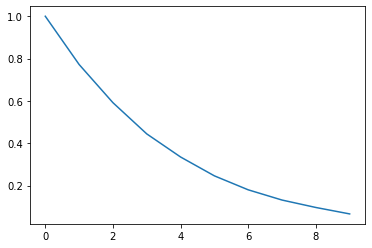

The average distance between maximal and minimal positions: 10.0
The average normalized difference in fitness between maximal and minimal positions: 5.221510969192491
The average distance in between the 90th+ percentile and the maximum is 2.6981553398058247
The average Number of Local Maxima is  1.0


In [60]:
(Min_Max_Dist, NormDist, AutoCor, Distance_90, Num_Max) = Get_LandScape_Statistics(N=8,K=0,Num_Landscapes=1,
                                    Alternative=False,Weights =np.array([.4,.6]),Sample_Size=200,Num_Steps=100)

print('The average distance between maximal and minimal positions:',Min_Max_Dist)
print('The average normalized difference in fitness between maximal and minimal positions:',NormDist)
print('The average distance in between the 90th+ percentile and the maximum is',Distance_90)
print('The average Number of Local Maxima is ',Num_Max)





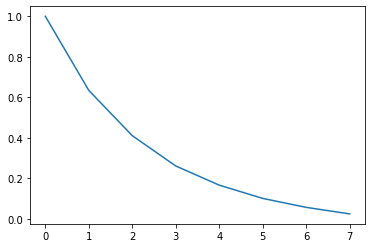

The average distance between maximal and minimal positions: 5.3
The average normalized difference in fitness between maximal and minimal positions: 4.99747343769156
The average distance in between the 90th+ percentile and the maximum is 2.3411538461538464
The average Number of Local Maxima is  2.87


In [62]:
(Min_Max_Dist, NormDist, AutoCor, Distance_90, Num_Max)  = Get_LandScape_Statistics(N=8,K=1,Num_Landscapes=1,
                                    Alternative=False,Weights =np.array([.4,.6]),Sample_Size=200,Num_Steps=100)
print('The average distance between maximal and minimal positions:',Min_Max_Dist)
print('The average normalized difference in fitness between maximal and minimal positions:',NormDist)
print('The average distance in between the 90th+ percentile and the maximum is',Distance_90)
print('The average Number of Local Maxima is ',Num_Max)



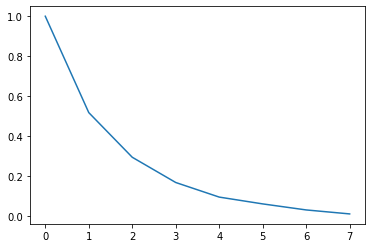

The average distance between maximal and minimal positions: 4.6
The average normalized difference in fitness between maximal and minimal positions: 5.239705060989645
The average distance in between the 90th+ percentile and the maximum is 2.8692307692307693
The average Number of Local Maxima is  5.825


In [63]:
(Min_Max_Dist, NormDist, AutoCor, Distance_90, Num_Max) = Get_LandScape_Statistics(N=8,K=2,Num_Landscapes=1,
                                    Alternative=False,Weights =np.array([.4,.6]),Sample_Size=200,Num_Steps=100)
print('The average distance between maximal and minimal positions:',Min_Max_Dist)
print('The average normalized difference in fitness between maximal and minimal positions:',NormDist)
print('The average distance in between the 90th+ percentile and the maximum is',Distance_90)
print('The average Number of Local Maxima is ',Num_Max)



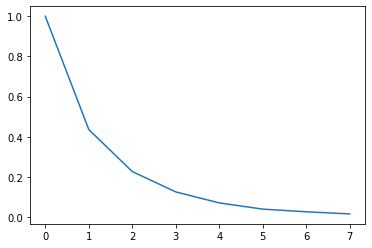

The average distance between maximal and minimal positions: 4.56
The average normalized difference in fitness between maximal and minimal positions: 5.3372574990383725
The average distance in between the 90th+ percentile and the maximum is 3.1869230769230774
The average Number of Local Maxima is  9.06


In [64]:
(Min_Max_Dist, NormDist, AutoCor, Distance_90, Num_Max) = Get_LandScape_Statistics(N=8,K=3,Num_Landscapes=1,
                                    Alternative=False,Weights =np.array([.4,.6]),Sample_Size=200,Num_Steps=100)
print('The average distance between maximal and minimal positions:',Min_Max_Dist)
print('The average normalized difference in fitness between maximal and minimal positions:',NormDist)
print('The average distance in between the 90th+ percentile and the maximum is',Distance_90)
print('The average Number of Local Maxima is ',Num_Max)



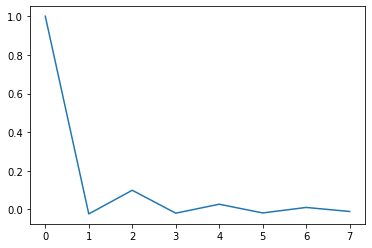

The average distance between maximal and minimal positions: 4.075
The average normalized difference in fitness between maximal and minimal positions: 5.452044349500194
The average distance in between the 90th+ percentile and the maximum is 3.856923076923077
The average Number of Local Maxima is  28.635


In [65]:
(Min_Max_Dist, NormDist, AutoCor, Distance_90, Num_Max) = Get_LandScape_Statistics(N=8,K=8,Num_Landscapes=1,
                                    Alternative=False,Weights =np.array([.4,.6]),Sample_Size=200,Num_Steps=100)
print('The average distance between maximal and minimal positions:',Min_Max_Dist)
print('The average normalized difference in fitness between maximal and minimal positions:',NormDist)
print('The average distance in between the 90th+ percentile and the maximum is',Distance_90)
print('The average Number of Local Maxima is ',Num_Max)



## Below are Layered Landscapes
They consist of a linear combination of 2 landscapes: 2/3 a K=0 landscape and 1/3 a landscape of K specified below.



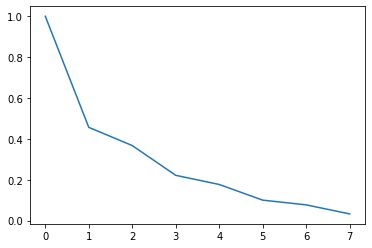

The average distance between maximal and minimal positions: 5.84
The average normalized difference in fitness between maximal and minimal positions: 5.319064593693919
The average distance in between the 90th+ percentile and the maximum is 2.6586538461538463
The average Number of Local Maxima is  14.94


In [1223]:
(Min_Max_Dist, NormDist, AutoCor, Distance_90, Num_Max) = Get_LandScape_Statistics(N=8,K=8,Num_Landscapes=2,
                                    Alternative=False,Weights =np.array([.333333,.666666]),
                                    Sample_Size = 200 ,Num_Steps=100)

print('The average distance between maximal and minimal positions:',Min_Max_Dist)
print('The average normalized difference in fitness between maximal and minimal positions:',NormDist)
print('The average distance in between the 90th+ percentile and the maximum is',Distance_90)
print('The average Number of Local Maxima is ', Num_Max)



In [17]:
(Min_Max_Dist, NormDist, AutoCor, Distance_90, Num_Max) = Get_LandScape_Statistics(N=8,K=4,Num_Landscapes=2,
                                    Alternative=False,Weights =np.array([.333333,.666666]),
                                    Sample_Size = 200 ,Num_Steps=100)
print('The average distance between maximal and minimal positions:',Min_Max_Dist)
print('The average normalized difference in fitness between maximal and minimal positions:',NormDist)
print('The average distance in between the 90th+ percentile and the maximum is',Distance_90)
print('The average Number of Local Maxima is ',Num_Max)



NameError: name 'Get_LandScape_Statistics' is not defined

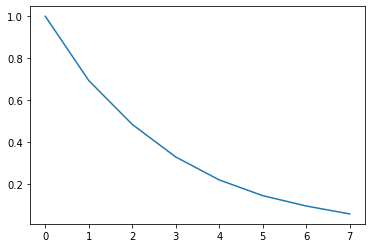

The average distance between maximal and minimal positions: 6.24
The average normalized difference in fitness between maximal and minimal positions: 4.833942402340907
The average distance in between the 90th+ percentile and the maximum is 2.0451923076923078
The average Number of Local Maxima is  1.455


In [1225]:
(Min_Max_Dist, NormDist, AutoCor, Distance_90, Num_Max) = Get_LandScape_Statistics(N=8,K=1,Num_Landscapes=2,
                                    Alternative=False,Weights =np.array([.333333,.666666]),
                                    Sample_Size = 200 ,Num_Steps=100)
print('The average distance between maximal and minimal positions:',Min_Max_Dist)
print('The average normalized difference in fitness between maximal and minimal positions:',NormDist)
print('The average distance in between the 90th+ percentile and the maximum is',Distance_90)
print('The average Number of Local Maxima is ',Num_Max)



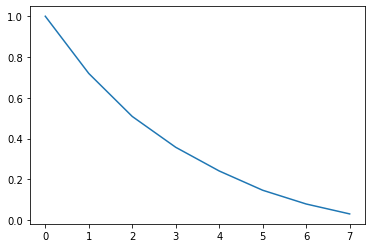

The average distance between maximal and minimal positions: 8.0
The average normalized difference in fitness between maximal and minimal positions: 4.642101688089429
The average distance in between the 90th+ percentile and the maximum is 1.921730769230769
The average Number of Local Maxima is  1.0


In [1226]:
(Min_Max_Dist, NormDist, AutoCor, Distance_90, Num_Max) = Get_LandScape_Statistics(N=8,K=0,Num_Landscapes=2,
                                    Alternative=False,Weights =np.array([.333333,.666666]),
                                    Sample_Size = 200 ,Num_Steps=100)
print('The average distance between maximal and minimal positions:',Min_Max_Dist)
print('The average normalized difference in fitness between maximal and minimal positions:',NormDist)
print('The average distance in between the 90th+ percentile and the maximum is',Distance_90)
print('The average Number of Local Maxima is ',Num_Max)



In [ ]:
##Additions below

In [ ]:
(Min_Max_Dist, NormDist, AutoCor, Distance_90, Num_Max) = Get_LandScape_Statistics(N=10,K=5,Num_Landscapes=2,
                                    Alternative=False,Weights =np.array([.5,.5]),
                                    Sample_Size = 100 ,Num_Steps=100)

print('The average distance between maximal and minimal positions:',Min_Max_Dist)
print('The average normalized difference in fitness between maximal and minimal positions:',NormDist)
print('The average distance in between the 90th+ percentile and the maximum is',Distance_90)
print('The average Number of Local Maxima is ', Num_Max)



In [ ]:
(Min_Max_Dist, NormDist, AutoCor, Distance_90, Num_Max) = Get_LandScape_Statistics(N=10,K=10,Num_Landscapes=2,
                                    Alternative=False,Weights =np.array([.5,.5]),
                                    Sample_Size = 100 ,Num_Steps=100)

print('The average distance between maximal and minimal positions:',Min_Max_Dist)
print('The average normalized difference in fitness between maximal and minimal positions:',NormDist)
print('The average distance in between the 90th+ percentile and the maximum is',Distance_90)
print('The average Number of Local Maxima is ', Num_Max)



## Discussion


The results are interesing. We can see, for example, in the first layered landscape (with K=8) that there are interesting properties not seen in the regular NK landscapes above. For one we notice the high path length/ distance (almost 6) between the global max and global minimum in the K=8 for second layer landscape - higher than any regular NK landscape except for K=0. We also see that there are a high number of local maxima - suggesting a rugged landscape. This suggests that there is clear seperation between the global max and minimum, but that getting there is hard as there are many local maxima along the way, especially near the global maxima. We notice that the 90th percentile of values tends to cluster within a path distancd of 2-2.7 steps from the global maxima (much less compared to unlayered high K landscapes).

This is a key benefit as the regular NK landscapes generated high numbers of local maxima with high K, but there was not clear seperation between maxima and minima. Indeed our Layered Landscapes are able to maintain some levesl of autocorrelation.

From these simulations we may further notice that the layered landscape differs from the singular landscape in that by layering the landscapes we are able to achieve a relatively large difference (normalized by standard deviation) between the global maxima and minima.

Future analysis can vary N, K, and the weights.





